In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
import psycopg2

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)


engine.dispose()

In [18]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

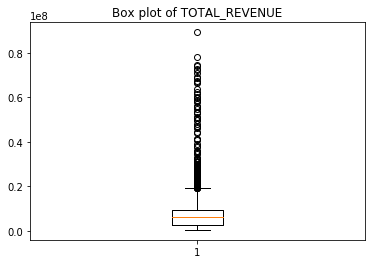

In [37]:
import matplotlib.pyplot as plt

plt.title("Box plot of TOTAL_REVENUE")
plt.boxplot(useducation_df["TOTAL_REVENUE"])
plt.show()

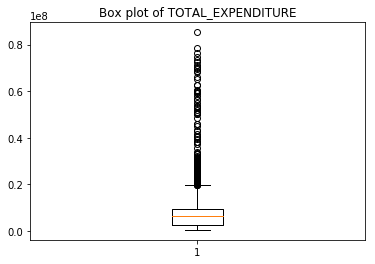

In [41]:
import matplotlib.pyplot as plt

plt.title("Box plot of TOTAL_EXPENDITURE")
plt.boxplot(useducation_df["TOTAL_EXPENDITURE"])
plt.show()

In [34]:
print(useducation_df.head())


       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

          ...           GRADES_4_G  GRADES_8

In [23]:
useducation_df["TOTAL_REVENUE"].fillna(useducation_df["TOTAL_REVENUE"].mean(), inplace=True)


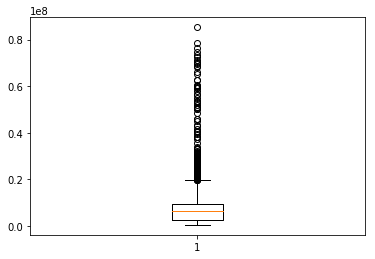

In [40]:
useducation_df["TOTAL_EXPENDITURE"].fillna(useducation_df["TOTAL_EXPENDITURE"].mean(), inplace=True)

import matplotlib.pyplot as plt

plt.boxplot(useducation_df["TOTAL_EXPENDITURE"])
plt.show()

In [26]:
useducation_df.isnull().sum()*100/useducation_df.count()

PRIMARY_KEY                       0.000000
STATE                             0.000000
YEAR                              0.000000
ENROLL                           21.399512
TOTAL_REVENUE                     0.000000
FEDERAL_REVENUE                  16.562500
STATE_REVENUE                    16.562500
LOCAL_REVENUE                    16.562500
TOTAL_EXPENDITURE                16.562500
INSTRUCTION_EXPENDITURE          16.562500
SUPPORT_SERVICES_EXPENDITURE     16.562500
OTHER_EXPENDITURE                21.399512
CAPITAL_OUTLAY_EXPENDITURE       16.562500
GRADES_PK_G                      13.115997
GRADES_KG_G                       9.705882
GRADES_4_G                        9.625276
GRADES_8_G                        9.625276
GRADES_12_G                       9.625276
GRADES_1_8_G                      9.625276
GRADES_9_12_G                     9.625276
GRADES_ALL_G                     13.115997
AVG_MATH_4_SCORE                178.358209
AVG_MATH_8_SCORE                180.451128
AVG_READING

In [27]:
from scipy.stats import zscore

z_scores = zscore(useducation_df["TOTAL_REVENUE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   56,   85,   96,  108,  137,  150,  161,  190,  201,
        213,  241,  252,  264,  292,  304,  316,  344,  355,  367,  396,
        407,  420,  449,  460,  472,  481,  501,  512,  524,  552,  564,
        576,  605,  616,  628,  633,  637,  654,  656,  662,  668,  680,
        685,  689,  706,  708,  714,  719,  731,  737,  741,  758,  760,
        763,  766,  771,  784,  789,  793,  802,  811,  813,  816,  819,
        824,  836,  842,  846,  855,  863,  865,  868,  871,  876,  891,
        897,  901,  919,  921,  924,  927,  932,  944,  950,  954,  971,
        973,  976,  979,  984,  997, 1002, 1006, 1023, 1025, 1028, 1031,
       1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088, 1101, 1106,
       1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161, 1178, 1180,
       1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234, 1237, 1242,
       1254, 1259, 1263, 1280, 1282, 1285]),)
Number of outliers is:

In [29]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(useducation_df["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((useducation_df["TOTAL_REVENUE"] > max_val) 
                      | (useducation_df["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 194
The score threshold is: 1.5
Number of outliers is: 150
The score threshold is: 2.0
Number of outliers is: 121
The score threshold is: 2.5
Number of outliers is: 93
The score threshold is: 3.0
Number of outliers is: 66
The score threshold is: 3.5
Number of outliers is: 51
The score threshold is: 4.0
Number of outliers is: 45
The score threshold is: 4.5
Number of outliers is: 42


TypeError: can only concatenate str (not "int") to str

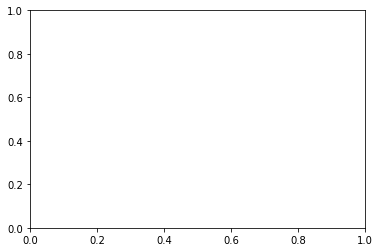

In [31]:
plt.boxplot(useducation_df)
plt.title("TOTAL_REVENUE (whis=1.5)")
plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


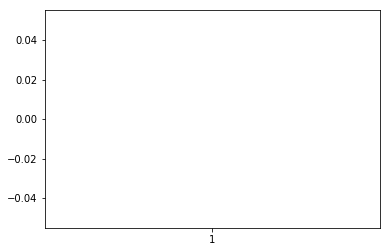

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(useducation_df["TOTAL_EXPENDITURE"])
plt.show()

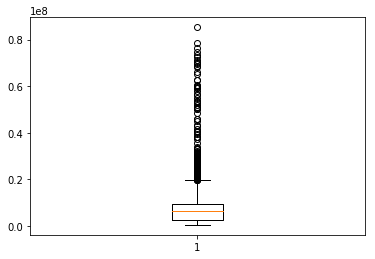

In [42]:
import matplotlib.pyplot as plt

plt.boxplot(useducation_df["TOTAL_EXPENDITURE"])
plt.show()

In [43]:
#1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

#Yes there are many outliers and I also calculated z scores for all it looks like 3 SDs is probably best 

#2.If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

# I am not sure how to eliminate them... there are so many. 

#3.Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

#

#4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

#5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

#6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?



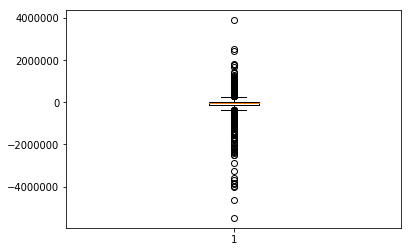

In [44]:
import matplotlib.pyplot as plt

plt.boxplot((useducation_df["TOTAL_REVENUE"]) - (useducation_df["TOTAL_EXPENDITURE"]))
plt.show()

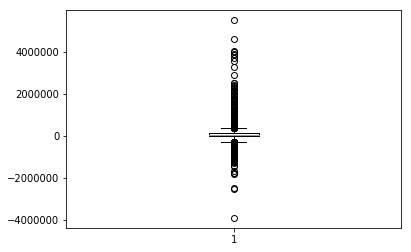

In [45]:

plt.boxplot((useducation_df["TOTAL_EXPENDITURE"]) - (useducation_df["TOTAL_REVENUE"]))
plt.show()